In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

import xgboost as xgb

pd.set_option('display.max_rows', 9999)

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,rate_spread
0,0,2,1,1,1,139,1,261,14,246,...,77.0,5949.0,11.642,63192.0,100.000,1556.0,1993.0,2094,True,1
1,1,2,2,1,1,160,3,349,48,311,...,42.0,2667.0,37.141,63693.0,75.729,875.0,1163.0,4194,False,2
2,2,1,2,1,1,168,3,385,30,256,...,34.0,6393.0,79.635,42883.0,76.948,636.0,1611.0,1119,False,3
3,3,1,2,1,1,57,3,117,30,46,...,37.0,7175.0,72.843,63806.0,78.836,1587.0,2172.0,1119,False,6
4,4,2,1,2,1,25,3,95,41,192,...,46.0,5041.0,23.188,70908.0,59.579,756.0,1992.0,1593,False,4


In [4]:
df.tail()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,rate_spread
199995,199995,1,1,3,1,24,3,96,14,181,...,26.0,4004.0,27.457,64341.0,55.846,916.0,1787.0,1249,False,1
199996,199996,1,2,1,1,20,3,261,2,232,...,28.0,4522.0,21.116,48686.0,89.897,1174.0,1866.0,3924,False,5
199997,199997,4,1,3,1,67,3,261,50,52,...,NaN,6854.0,4.093,55918.0,100.000,2034.0,3193.0,3864,False,1
199998,199998,2,1,3,1,330,3,29,30,249,...,NaN,6743.0,73.604,60750.0,81.713,973.0,1401.0,1645,True,1
199999,199999,2,1,2,1,11,3,43,6,255,...,70.0,7740.0,13.632,74058.0,100.000,1857.0,2215.0,2712,False,6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 23 columns):
row_id                            200000 non-null int64
loan_type                         200000 non-null int64
property_type                     200000 non-null int64
loan_purpose                      200000 non-null int64
occupancy                         200000 non-null int64
loan_amount                       200000 non-null int64
preapproval                       200000 non-null int64
msa_md                            200000 non-null int64
state_code                        200000 non-null int64
county_code                       200000 non-null int64
applicant_ethnicity               200000 non-null int64
applicant_race                    200000 non-null int64
applicant_sex                     200000 non-null int64
applicant_income                  189292 non-null float64
population                        198005 non-null float64
minority_population_pct           198005 non-

In [6]:
df.describe()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,rate_spread
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,189292.000000,198005.000000,198005.000000,198015.000000,197977.000000,197988.000000,197984.000000,200000.000000,200000.000000
mean,99999.500000,1.570935,1.154880,1.482605,1.061385,142.574940,2.702950,226.974970,28.202045,166.335230,...,1.417540,73.617902,5391.099099,34.238640,64595.355801,89.283022,1402.872401,1927.336618,2001.311505,1.979110
std,57735.171256,0.559410,0.365066,0.822156,0.246043,142.559487,0.545658,106.655259,15.593383,92.852518,...,0.577133,105.696934,2669.028807,27.930882,12724.514485,15.059223,706.880410,886.576586,1271.134197,1.656809
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-1.000000,0.000000,...,1.000000,1.000000,7.000000,0.326000,17860.000000,6.193000,3.000000,6.000000,0.000000,1.000000
25%,49999.750000,1.000000,1.000000,1.000000,1.000000,67.000000,2.000000,154.000000,14.000000,83.000000,...,1.000000,39.000000,3717.000000,10.928000,56654.000000,81.648000,932.000000,1344.000000,963.000000,1.000000
50%,99999.500000,2.000000,1.000000,1.000000,1.000000,116.000000,3.000000,261.000000,30.000000,181.000000,...,1.000000,56.000000,4959.000000,25.996000,63485.000000,98.959000,1304.000000,1799.000000,1834.000000,1.000000
75%,149999.250000,2.000000,1.000000,2.000000,1.000000,179.000000,3.000000,318.000000,41.000000,249.000000,...,2.000000,83.000000,6470.000000,52.000000,71238.000000,100.000000,1742.000000,2353.000000,3180.000000,2.000000
max,199999.000000,4.000000,3.000000,3.000000,3.000000,11104.000000,3.000000,408.000000,52.000000,316.000000,...,4.000000,10042.000000,34126.000000,100.000000,125095.000000,100.000000,8747.000000,13615.000000,4283.000000,99.000000


In [7]:
df.shape

(200000, 23)

In [12]:
pd.options.display.max_rows
df['lender'].value_counts()


1119    9235
1268    5445
659     5217
3180    3174
2816    2973
        ... 
3662       1
3229       1
2678       1
2129       1
1053       1
Name: lender, Length: 3893, dtype: int64

In [13]:
df['lender'].unique()

array([2094, 4194, 1119, ..., 3517, 3635, 3633], dtype=int64)

In [14]:
lender = pd.Series(df['lender'].unique())

In [21]:
lender2 = pd.DataFrame(df['lender'].unique())

In [27]:
lender2

,0
0,2094
1,4194
2,1119
3,1593
4,2800
5,3797
6,2428
7,1268
8,516
9,2454


In [28]:
lender2.count()  #3893 unique numbers

0    3893
dtype: int64

In [9]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [10]:
X.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant
0,0,2,1,1,1,139,1,261,14,246,...,1,77.0,5949.0,11.642,63192.0,100.000,1556.0,1993.0,2094,True
1,1,2,2,1,1,160,3,349,48,311,...,1,42.0,2667.0,37.141,63693.0,75.729,875.0,1163.0,4194,False
2,2,1,2,1,1,168,3,385,30,256,...,1,34.0,6393.0,79.635,42883.0,76.948,636.0,1611.0,1119,False
3,3,1,2,1,1,57,3,117,30,46,...,1,37.0,7175.0,72.843,63806.0,78.836,1587.0,2172.0,1119,False
4,4,2,1,2,1,25,3,95,41,192,...,2,46.0,5041.0,23.188,70908.0,59.579,756.0,1992.0,1593,False


In [11]:
y.head()

0    1
1    2
2    3
3    6
4    4
Name: rate_spread, dtype: int64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
X_train.shape

(160000, 22)

In [14]:
y_train.shape

(160000,)

In [15]:
xgbreg = xgb.XGBRegressor()

In [16]:
xgbreg.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10:16:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

<Figure size 2160x1440 with 0 Axes>

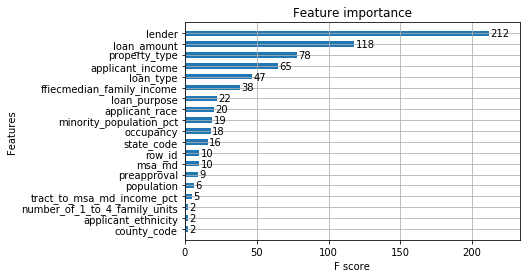

In [34]:
plt.figure(figsize=(30,20))
xgb.plot_importance(xgbreg, height=0.5)
plt.show()

In [25]:
y_pred = xgbreg.predict(X_test)

In [26]:
y_pred.shape

(40000,)

In [27]:
mean_squared_error(y_test,y_pred)

1.1585957294877225

In [28]:
r2_score(y_test,y_pred)

0.5883707589770241